## Fitting stars as linear combinations of other stars
### to-do items / bugs:
- Add continuum terms to linear fit
- Check effects of regularization
- Patch rather than throw away missing data
- Look at all good Tc lines

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
with h5py.File('../data/block_o_spectra.hdf5') as f:
    fluxs = np.copy(f['fluxs'])
    waves = np.copy(f['waves'])
    star_names = np.copy(f['star_name'])
    
N = len(star_names)

One example of a potential Tc line:

(0.8, 1.0)

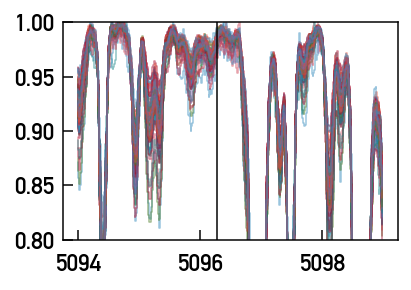

In [9]:
Tc_line = 5096.280
inds = (waves > 5094.) & (waves < 5099.)
for i in range(N):
    plt.step(waves[inds], fluxs[i,inds], alpha=0.5)
plt.axvline(Tc_line, color='k')
plt.ylim([0.8,1.0])

In [10]:
# Hackety fucking hack
tiny = 0.001 # magic
mask = fluxs > tiny
keep = np.sum(mask, axis=0) == N # OMG this is HARSH
# The line above saves us from having to repair the missing data.
# Hogg knows how to do that.

In [5]:
# trim data
waves = waves[keep]
fluxs = fluxs[:, keep]
mask = mask[:, keep]

In [7]:
def fit_one_spectrum(thisn, hyper = 0.1):
    """
    bugs:
    -----
    - Depends on global variables.
    - Repeating code.
    """
    otherns = np.delete(np.arange(N), thisn)
    A = fluxs[otherns, :]
    ATA = np.dot(A, A.T)
    ATy = np.dot(A, fluxs[thisn])
    lambdainv = np.eye(N-1) * (hyper / (N * N))
    # regularized least-square fit
    x = np.linalg.solve(ATA + lambdainv, ATy)
    y_predicted = np.dot(A.T, x)
    return y_predicted

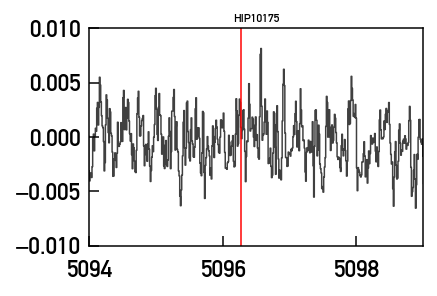

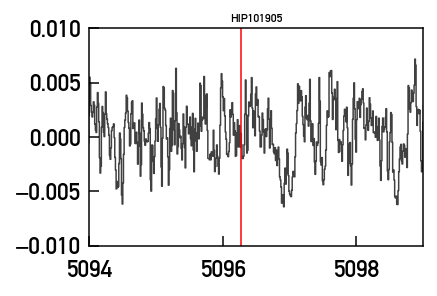

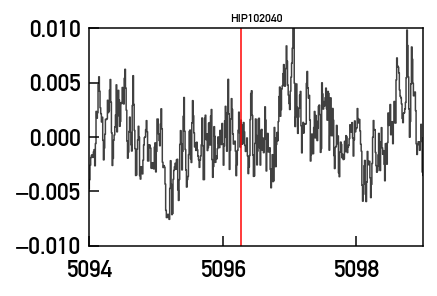

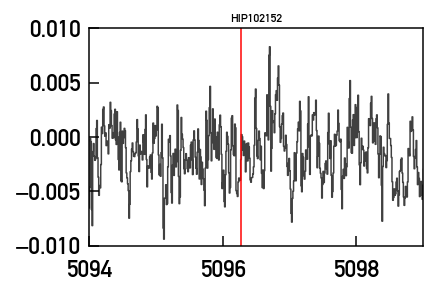

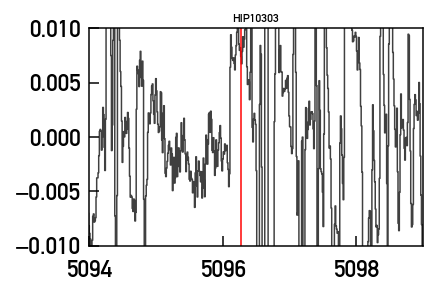

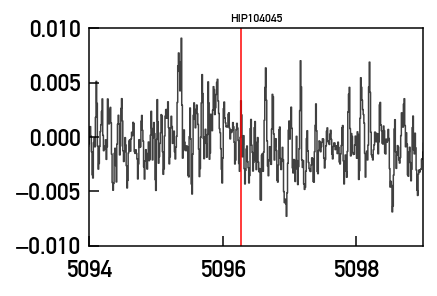

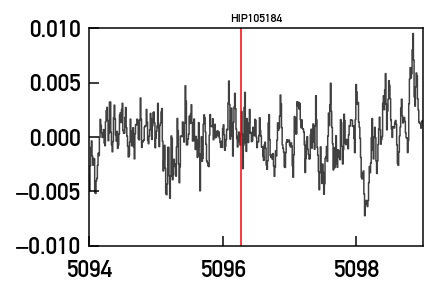

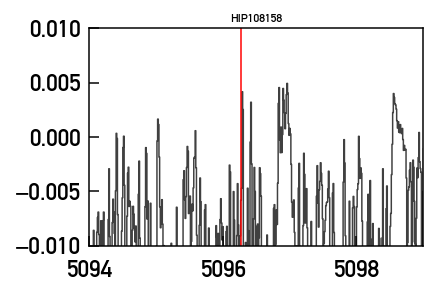

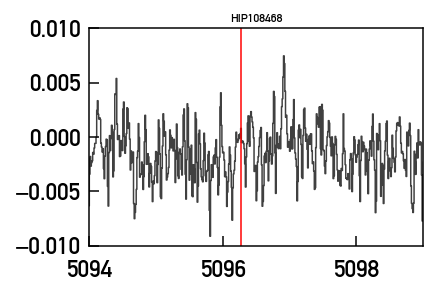

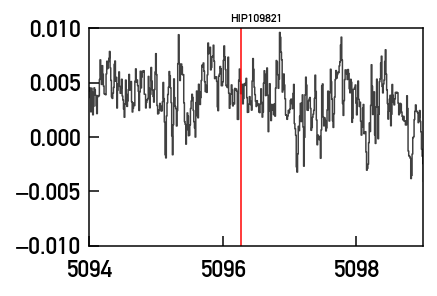

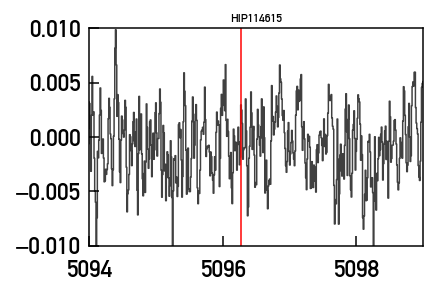

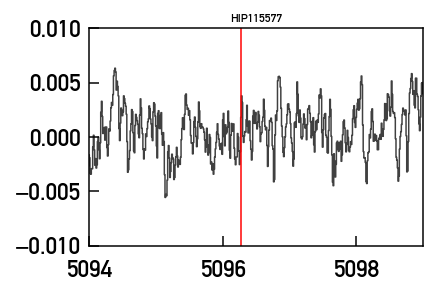

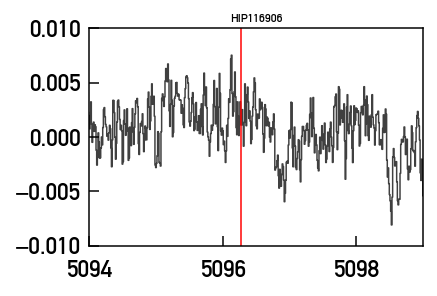

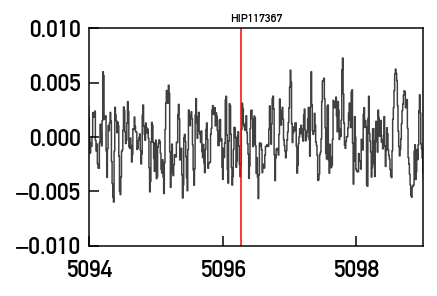

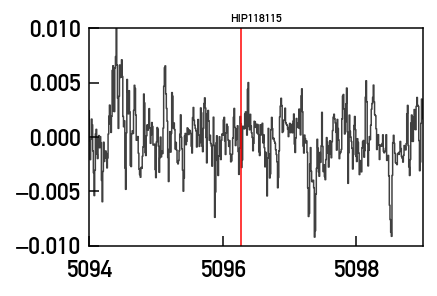

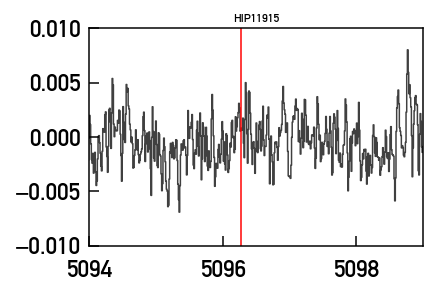

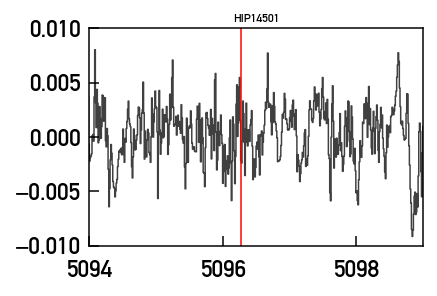

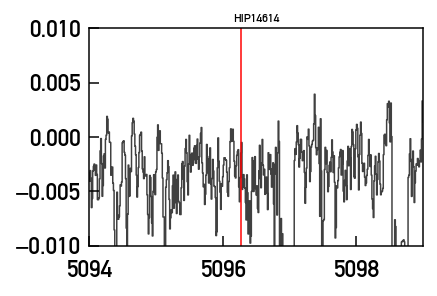

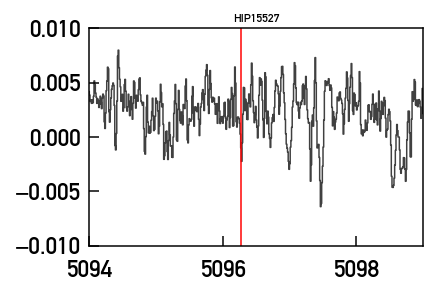

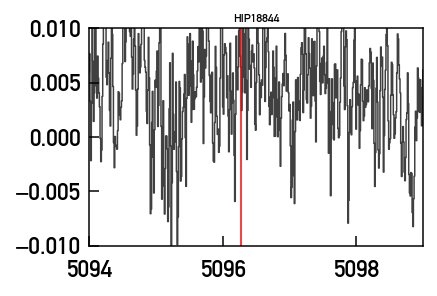

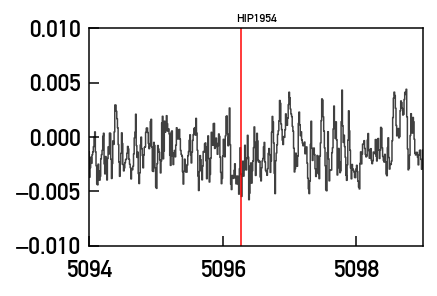

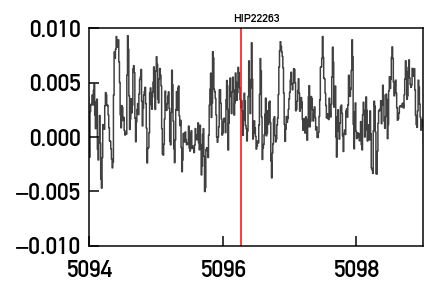

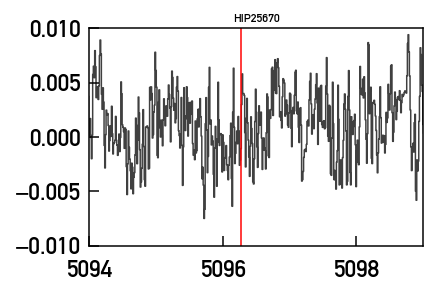

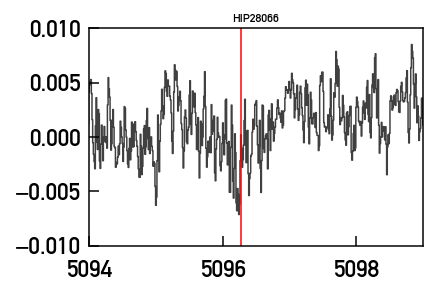

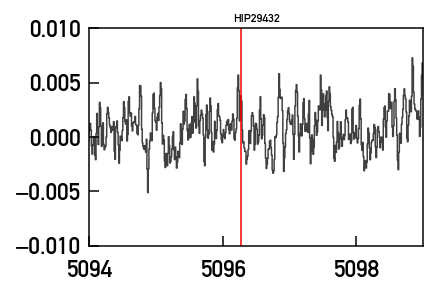

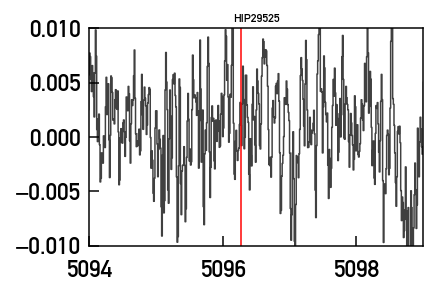

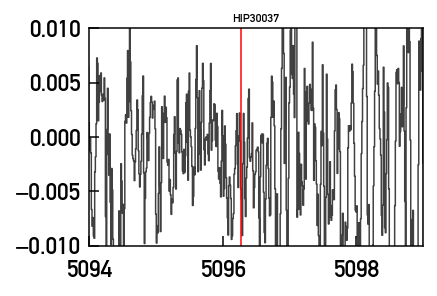

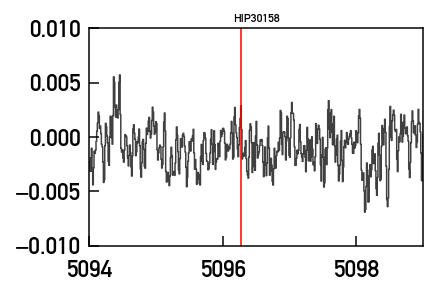

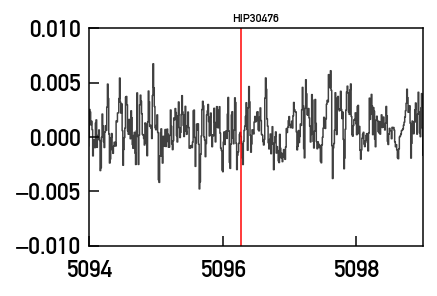

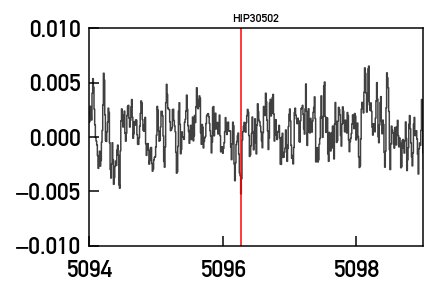

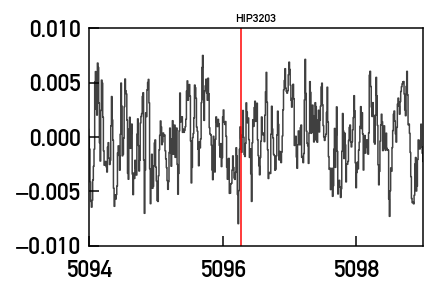

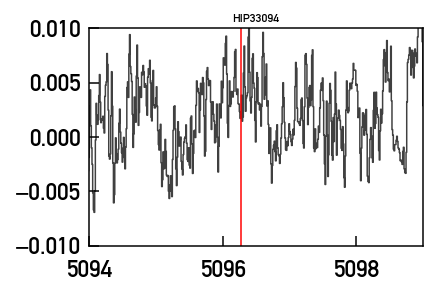

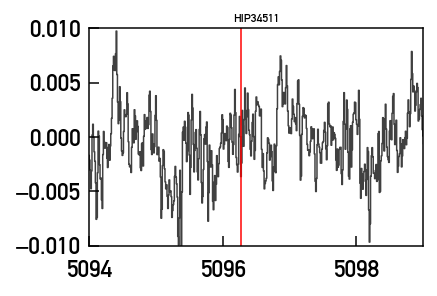

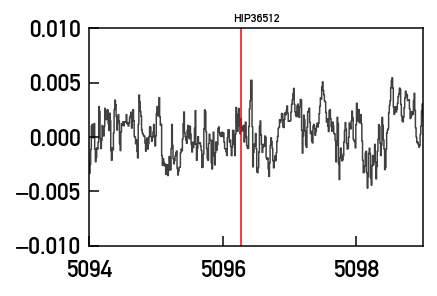

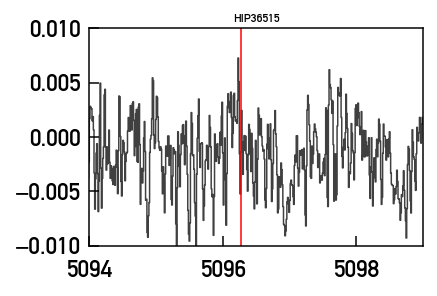

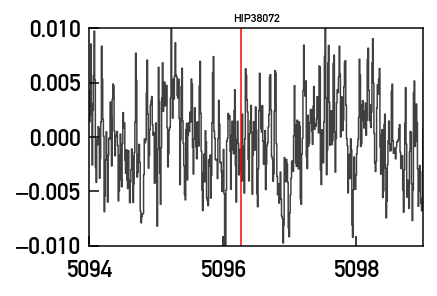

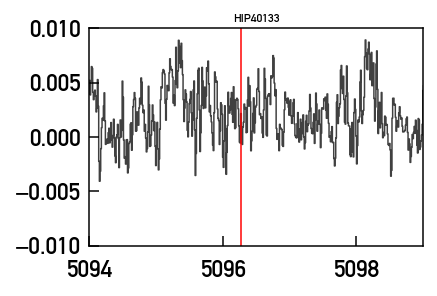

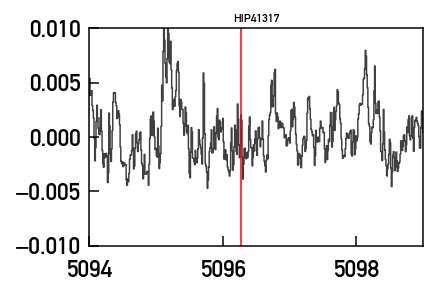

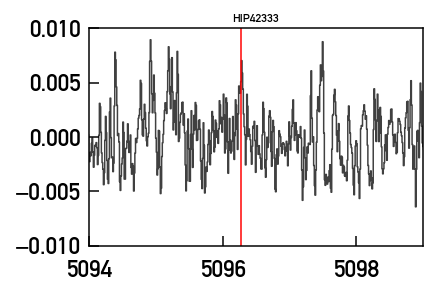

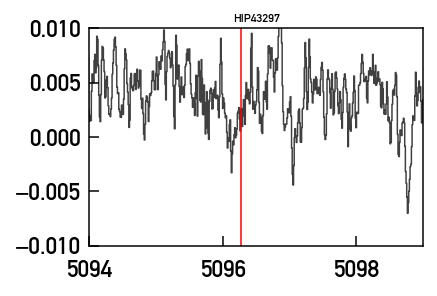

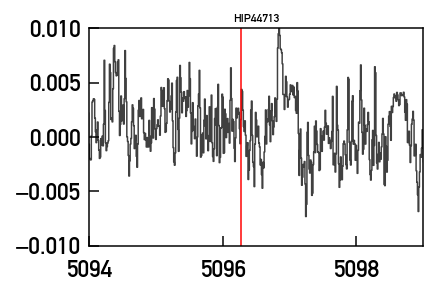

KeyboardInterrupt: 

In [8]:
xlim = (5094, 5099)
for n in range(N):
    y_predicted = fit_one_spectrum(n)
    plt.clf()
    plt.step(waves, fluxs[n] - y_predicted, color="k", alpha=0.75)
    plt.axvline(Tc_line, color="r")
    plt.xlim(xlim)
    plt.ylim(-0.01, 0.01)
    plt.title(star_names[n])
    plt.show()